ALGORITHM EVALUATION 

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

READ THE DATASET

In [3]:
 import pandas as pd
 df = pd.read_csv('C:/Datasets/train_titanic.csv')
 df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


SEPARATE X AND Y 

In [5]:
X = df.drop(labels=['PassengerId','Name','Survived'],axis=1)
Y = df[['Survived']]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


CAT CON SEPARATION X

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
cat1 = ['Cabin']
cat2 = ['Sex', 'Ticket', 'Cabin', 'Embarked']

BUILD SKLEARN PIPELINE

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [14]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


TRAIN TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtest.shape

(179, 986)

In [19]:
xtrain.shape

(712, 986)

In [20]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

ALGORITHM EVALUTION

In [21]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
dct = {'Logistic':LogisticRegression(),
        'Decision Tree':DecisionTreeClassifier(),
        'Random Forest':RandomForestClassifier(),
        'Gradient Boost':GradientBoostingClassifier(),
        'KNN':KNeighborsClassifier(),
        'SVM':SVC()}



In [23]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [24]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict Training and testing values
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calulate F1 score in training and testing
    tr_f1 = f1_score(ytrain,ypred_tr)
    ts_f1 = f1_score(ytest,ypred_ts)
    # Cross Validation F1 on training
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv = scores.mean()
    # Append all above values in the lists
    tr.append(tr_f1)
    ts.append(ts_f1)
    tr_cv.append(f1_cv)
    # Print the results
    print(f'Model : {name}')
    print(f'Training F1 : {tr_f1}')
    print(f'Testing F1  : {ts_f1}')
    print(f'Cross Validated : {f1_cv}')
    print('\n==========================================\n')

Model : Logistic
Training F1 : 0.8359374999999999
Testing F1  : 0.7916666666666666
Cross Validated : 0.7295206869474147


Model : Decision Tree
Training F1 : 0.9981308411214954
Testing F1  : 0.7832167832167832
Cross Validated : 0.7396640252942589


Model : Random Forest
Training F1 : 0.9981308411214954
Testing F1  : 0.7819548872180451
Cross Validated : 0.7568831924008727


Model : Gradient Boost
Training F1 : 0.8140495867768596
Testing F1  : 0.7352941176470588
Cross Validated : 0.7495190793671036


Model : KNN
Training F1 : 0.8172888015717092
Testing F1  : 0.7482014388489208
Cross Validated : 0.7066957108233114


Model : SVM
Training F1 : 0.7953216374269005
Testing F1  : 0.7659574468085106
Cross Validated : 0.7528148382191789




STORING ABOVE RESULTS IN DataFrame format

In [26]:
eval_dct = {'Model_name':list(dct.keys()),
            'Train F1' :tr,
            'Test F1' : ts,
            'F1 CV' : tr_cv}

eval_df = pd.DataFrame(eval_dct)

In [27]:
eval_df

,Model_name,Train F1,Test F1,F1 CV
0,Logistic,0.835937,0.791667,0.729521
1,Decision Tree,0.998131,0.783217,0.739664
2,Random Forest,0.998131,0.781955,0.756883
3,Gradient Boost,0.814050,0.735294,0.749519
4,KNN,0.817289,0.748201,0.706696
5,SVM,0.795322,0.765957,0.752815


In [28]:
eval_df.sort_values(by='Test F1',ascending=False)

,Model_name,Train F1,Test F1,F1 CV
0,Logistic,0.835937,0.791667,0.729521
1,Decision Tree,0.998131,0.783217,0.739664
2,Random Forest,0.998131,0.781955,0.756883
5,SVM,0.795322,0.765957,0.752815
4,KNN,0.817289,0.748201,0.706696
3,Gradient Boost,0.814050,0.735294,0.749519


SELECTING BEST MODEL LOGISTIC REGRESSION

In [29]:
params = {'C':[100,50,10,1,0.5,0.1,0.01]}

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 50, 10, 1, 0.5, 0.1, 0.01]},
                   scoring='f1')

In [33]:
rscv.best_params_

{'C': 50}

In [34]:
rscv.best_score_

0.7509266601907215

In [35]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=50)

In [36]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [37]:
tr_f1 = f1_score(ytrain,ypred_tr)
ts_f1 = f1_score(ytest,ypred_ts)

In [38]:
tr_f1

0.9869646182495344

In [39]:
ts_f1

0.7943262411347517

CONFUSION MATIX

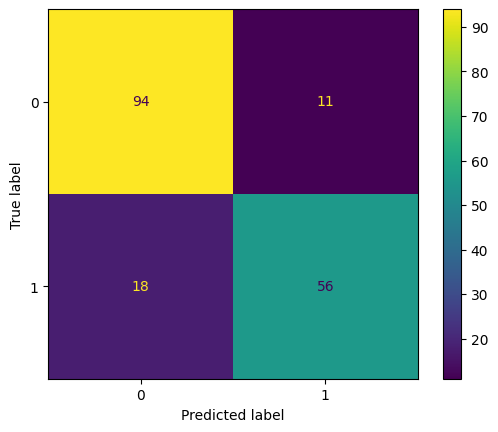

In [40]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_lr.classes_)
cfd.plot()

PRINT CLASSIFICATION REPORT

In [41]:
from sklearn.metrics import classification_report
print (classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



CREATE VOTING CLASSIFIER

In [47]:
params1 = {'max_depth':[2,3,4,5,6],
           'min_samples_split':[6,7,8,9,10],
           'criterion':['gini','entropy']}

In [48]:
dtc = DecisionTreeClassifier()
rscv1 = RandomizedSearchCV(dtc,param_distributions=params1,cv=5,scoring='f1')


In [49]:
rscv1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_split': [6, 7, 8, 9, 10]},
                   scoring='f1')

In [50]:
rscv1.best_params_

{'min_samples_split': 9, 'max_depth': 3, 'criterion': 'entropy'}

In [51]:
rscv.best_score_

0.7509266601907215

In [54]:
best_dtc = rscv1.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=9)

SVM MODEL

In [55]:
svm = SVC(probability=True)
svm.fit(xtrain,ytrain)

SVC(probability=True)

In [56]:
ypred_tr = svm.predict(xtrain)
ypred_ts = svm.predict(xtest)

In [57]:
f1_score(ytrain,ypred_tr)

0.7953216374269005

In [58]:
f1_score(ytest,ypred_ts)

0.7659574468085106

COMBINE TOP 3 CLASSIFIERS WITH VOTING CLASSIFIER

In [59]:
from sklearn.ensemble import  VotingClassifier
vc = VotingClassifier(estimators=[('lr',best_lr),('dtc',best_dtc),('svm',svm)],voting='soft',weights=[5,2,1])
vc.fit(xtrain,ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(C=50)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     min_samples_split=9)),
                             ('svm', SVC(probability=True))],
                 voting='soft', weights=[5, 2, 1])

In [60]:
ypred_tr = vc.predict(xtrain)
ypred_ts = vc.predict(xtest)

In [61]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



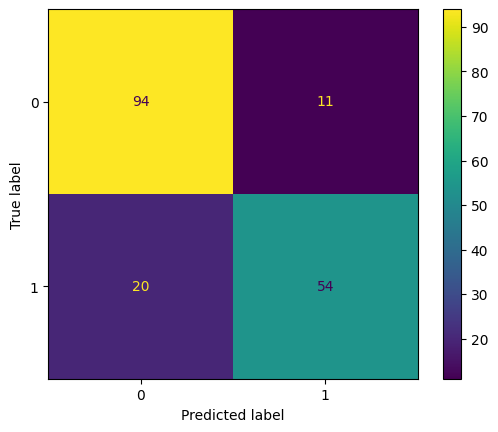

In [62]:
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=vc.classes_)
cfd.plot()

SELECT BEST LOGISTIC REGRESSION FOR FINAL MODEL

FIND THE ROC AUC

In [65]:
yprob_tr = best_lr.predict_proba(xtrain)[:,-1]
yprob_tr

array([8.39526538e-03, 2.82246395e-02, 8.57450765e-03, 9.33334561e-03,
       2.86595851e-02, 3.42128211e-02, 1.80400799e-02, 2.67182670e-02,
       1.07154432e-02, 9.83404113e-01, 9.63046148e-01, 5.36379646e-05,
       1.94134999e-02, 1.48660175e-02, 8.78811173e-01, 9.56684095e-01,
       9.99863309e-01, 9.90730853e-01, 1.64171862e-02, 9.99947192e-01,
       1.94392119e-02, 1.19329476e-03, 7.09016469e-02, 9.95769239e-01,
       9.17883531e-01, 9.02742225e-01, 9.65991618e-01, 1.01989150e-02,
       9.62618371e-01, 2.65921821e-04, 2.67595168e-03, 3.09727483e-02,
       9.58372763e-03, 9.67119675e-01, 1.36930707e-02, 3.24114898e-02,
       3.29971095e-04, 9.73587339e-01, 2.57382215e-02, 9.93837983e-01,
       1.06944730e-02, 1.07154432e-02, 1.01655348e-01, 1.28099437e-02,
       9.75874947e-01, 1.25069047e-02, 9.97672204e-01, 1.45226981e-02,
       1.66507877e-02, 9.48134662e-01, 9.61433183e-01, 1.56003431e-02,
       9.98742755e-01, 1.36940068e-02, 9.67677716e-01, 1.07403678e-02,
      

In [67]:
yprob_ts = best_lr.predict_proba(xtest)[:,-1]
yprob_ts

array([1.99577143e-02, 5.62572799e-02, 3.37038402e-02, 9.85385666e-01,
       9.99305606e-01, 9.67183756e-01, 8.22648008e-01, 5.55378352e-04,
       9.23348391e-01, 9.95999909e-01, 4.90749715e-01, 5.14818976e-03,
       3.24114898e-02, 2.97434451e-02, 3.89554589e-02, 9.97644378e-01,
       2.22879660e-01, 8.22703279e-01, 7.65732393e-02, 7.10619905e-02,
       2.47440969e-02, 1.70330618e-01, 8.16474081e-01, 3.39069686e-02,
       1.86948735e-02, 1.80931907e-04, 2.00156778e-01, 5.68956255e-02,
       2.91541431e-04, 7.14006656e-01, 3.63873011e-02, 8.36194745e-01,
       3.97297388e-01, 7.59885981e-01, 3.93088507e-02, 2.68986843e-02,
       5.39786170e-01, 8.22648008e-01, 9.25545143e-01, 1.81240068e-02,
       1.07808014e-02, 1.15158180e-02, 1.81371387e-02, 2.62997420e-02,
       1.20532769e-02, 2.52746340e-04, 3.64313578e-02, 2.69035336e-02,
       2.46466427e-02, 1.75403031e-01, 9.91540273e-01, 9.61756385e-01,
       2.23320215e-05, 9.94710323e-01, 1.42223124e-03, 9.96190583e-01,
      

In [68]:
# Calculate ROC AUC
from sklearn.metrics import roc_auc_score
tr_roc = roc_auc_score(ytrain,yprob_tr)
tr_roc

0.998134328358209

In [70]:
ts_roc = roc_auc_score(ytest,yprob_ts)
ts_roc

0.9154440154440155

In [71]:
scores = cross_val_score(best_lr,xtrain,ytrain,cv=5,scoring='roc_auc')
scores

array([0.85830212, 0.8534124 , 0.87937248, 0.84767861, 0.89772727])

In [72]:
scores.mean()

0.8672985776070364

Plot the ROC curve

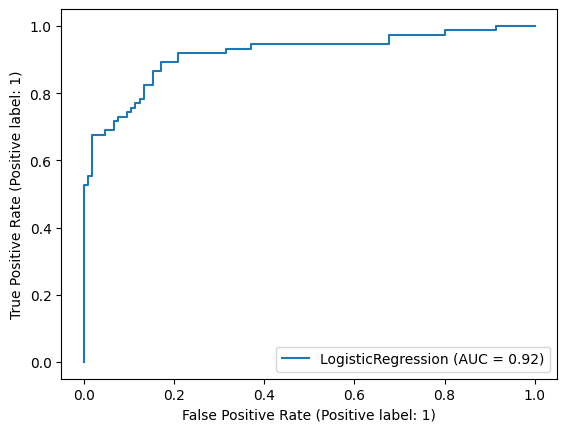

In [73]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

Testing CSV Predictions

In [75]:
df2 = pd.read_csv('C:/Datasets/test_titanic.csv')

In [76]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [79]:
xnew = pre.transform(df2).toarray()
xnew

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [80]:
xnew = pd.DataFrame(xnew,columns=cols)
xnew.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
prob = best_lr.predict_proba(xnew)[:,-1]
pred = best_lr.predict(xnew)

In [82]:
df_final = df2[['PassengerId']]

In [83]:
df_final['Survived_pred']=pred
df_final['Survived_prob']=prob

In [84]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.015858
1,893,0,0.323387
2,894,0,0.007334
3,895,0,0.019665
4,896,1,0.881058
...,...,...,...
413,1305,0,0.018137
414,1306,1,0.983916
415,1307,0,0.007920
416,1308,0,0.018137


In [85]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    262
1    156
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

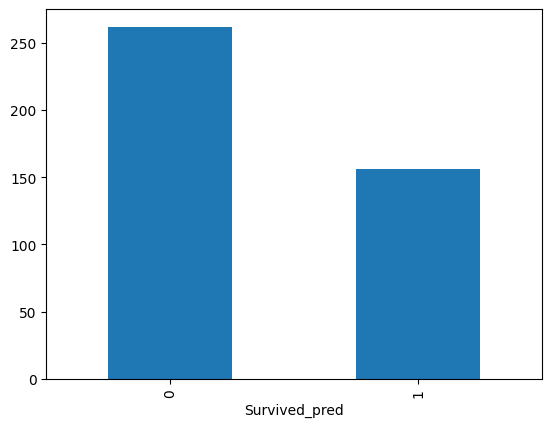

In [86]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

<Axes: xlabel='Survived_prob', ylabel='Count'>

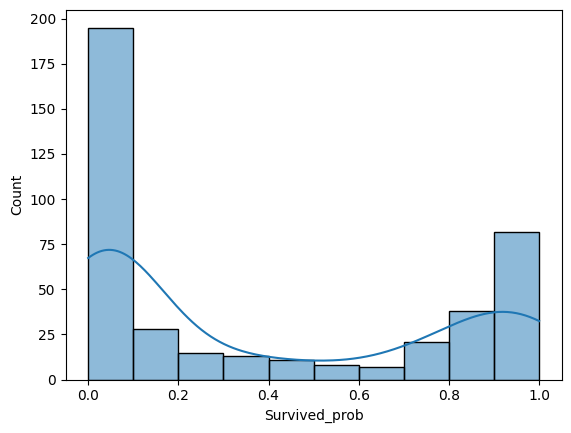

In [87]:
import seaborn as sns
sns.histplot(data=df_final,x='Survived_prob',kde=True)

Store the DataFrame in predictions.csv

In [88]:
df_final.to_csv('pred_csv',index=False)